In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [162]:
train = pd.read_csv('results.csv')

In [163]:
data = train

In [191]:
data.dtypes

_map            object
result_1         int64
result_2         int64
map_winner       int64
starting_ct      int64
ct_1             int64
t_2              int64
t_1              int64
ct_2             int64
rank_1           int64
rank_2           int64
map_wins_1       int64
map_wins_2       int64
match_winner     int64
all_rounds       int64
dtype: object

In [190]:
for i in data:
    print(i, sum(data[i].isna()))
# Пустых данных нет.

_map 0
result_1 0
result_2 0
map_winner 0
starting_ct 0
ct_1 0
t_2 0
t_1 0
ct_2 0
rank_1 0
rank_2 0
map_wins_1 0
map_wins_2 0
match_winner 0
all_rounds 0


In [165]:
data = data.drop(['team_1', 'team_2', 'date', 'match_id', 'event_id'], axis = 1)

In [166]:
data['all_rounds'] = data.ct_1 + data.ct_2 + data.t_2 + data.t_1

In [167]:
cur_data = data[data['all_rounds'].max() == data.all_rounds]


In [173]:
a = np.array([data['starting_ct'] == data['match_winner']])

In [169]:
# Предположим, что победа команды зависит от стороны, за которую они начинают играть.

In [188]:
print(f'В общем случае команды, начинающие за CT побеждают с вероятностью: {round(a.sum() / len(a[0]), 4)}.\n'
      f'Cоответственно, если команда начинает игру за T: {round(1 - a.sum() / len(a[0]), 4)}.\n'
     'Рассмотрим разные карты для получения более конкретного результата.')

В общем случае команды, начинающие за CT побеждают с вероятностью: 0.514.
Cоответственно, если команда начинает игру за T: 0.486.
Рассмотрим разные карты для получения более конкретного результата.


In [175]:
# Мы видим, что в общем случае команды с одинаковой вероятностью побеждают вне зависимости от того,
# за какую сторону они начинают играть. Тогда рассмотрим частные случаи на отдельных картах.

In [176]:
data_sets = {i._map:[0, 0] for i in data.iloc()}
for i in data.iloc():
#     print(i._map)
    data_sets[i._map][0] += i['starting_ct'] == i['match_winner']
    data_sets[i._map][1] += 1

In [189]:
for i in data_sets:
    print(f'On the {i} winrate CT: {round(data_sets[i][0] / data_sets[i][1], 4)}, winreate T: {round(1 - data_sets[i][0] / data_sets[i][1], 4)}')



On the Dust2 winrate CT: 0.5168, winreate T: 0.4832
On the Inferno winrate CT: 0.5206, winreate T: 0.4794
On the Vertigo winrate CT: 0.514, winreate T: 0.486
On the Overpass winrate CT: 0.5026, winreate T: 0.4974
On the Nuke winrate CT: 0.5074, winreate T: 0.4926
On the Mirage winrate CT: 0.5175, winreate T: 0.4825
On the Train winrate CT: 0.5113, winreate T: 0.4887
On the Default winrate CT: 0.619, winreate T: 0.381
On the Cache winrate CT: 0.5116, winreate T: 0.4884
On the Cobblestone winrate CT: 0.5215, winreate T: 0.4785


In [179]:
new_data = pd.DataFrame({i:[data_sets[i][0] / data_sets[i][1]] for i in data_sets})


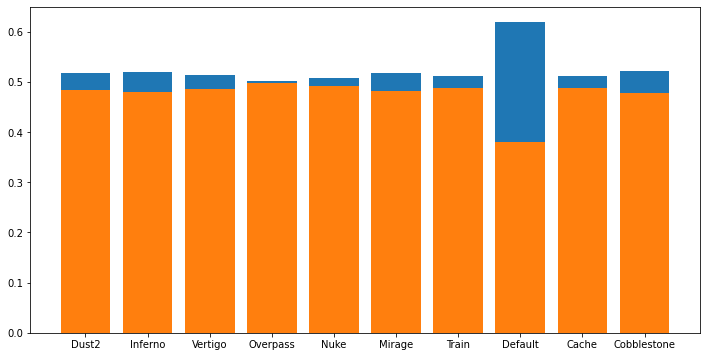

In [180]:


y = new_data.iloc[0]
x = np.array([i for i in new_data])
fig, ax = plt.subplots()

ax.bar(x, y)
ax.bar(x, np.array(1 - y))

fig.set_figwidth(12)   
fig.set_figheight(6)   

plt.show()

In [181]:
# На графике видно, что карта Default немного выбивается из общей картины, рассмотрим её отдельно.

In [182]:
print(f"Побед за СТ: {data_sets['Default'][0]}, всего игр: {data_sets['Default'][1]}")

Побед за СТ: 13, всего игр: 21


In [183]:
# Ввиду того, что набор данных для карты Default слишком мал по сравнению с другими картами

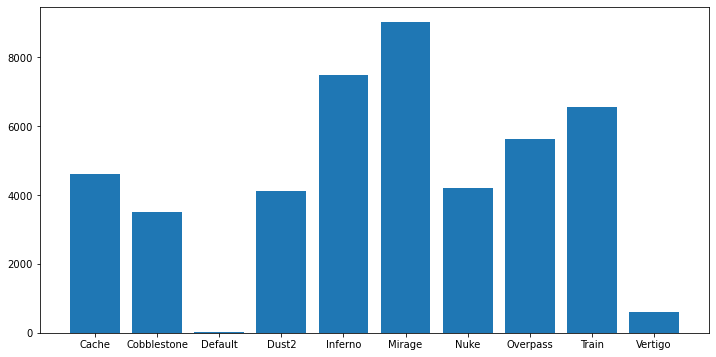

In [184]:
y = np.array([data_sets[i][1] for i in sorted(data_sets)])
x = np.array([i for i in sorted(data_sets)])
fig, ax = plt.subplots()

ax.bar(x, y)


fig.set_figwidth(12)   
fig.set_figheight(6)   

plt.show()

In [ ]:
# Подтверждение выше сказанного суждения можно увидеть на графике.

In [ ]:
# Подводя итоги: изначально наша гипотеза была неверна
# Т.к. из анализа данных мы выяснили, что победа некой команды не зависит от стороны, за которую она начала играть.